In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib

def compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays=['ublox', 'quectel'], graphs=['zte', 'nokia'], split=1, hist=False, bins=20, log=False):
    importlib.reload(j)
    j.compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays, graphs, split, hist, bins, log)

In [3]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson
9.999 324.8467
4.999 10.0
0.499 5.0
0.0877 0.5


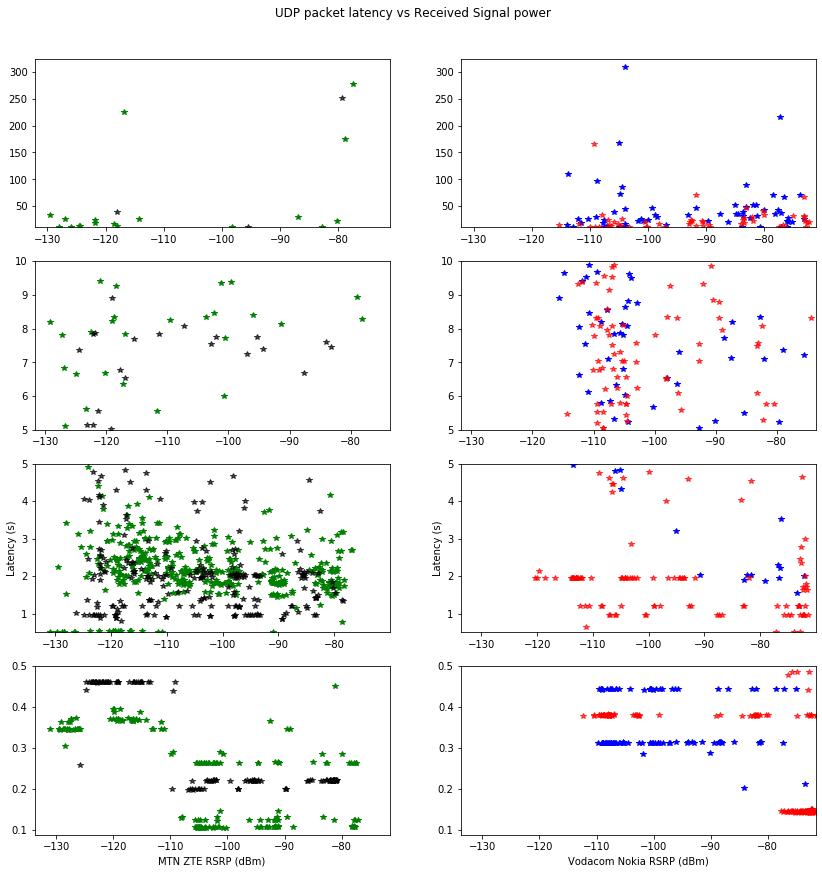

In [7]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 100
        limits = [10000, 5000, 500]
        r, lim = j.splitter(r, a, limits, split)
    elif key == 'Signal power':
        r *= a > -1350
        # lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet latency vs Received Signal power', 'Latency (s)', 'RSRP (dBm)', 'txTime', 'Signal power', 1000, 10, split=4)

In [13]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays


custom jupyter @DanielRobinson
ly None
ly None
ly None
ly None
0.07943282347242814 12.589254117941675
ly [5.0, 50.0]
ly [5.0, 50.0]
ly [5.0, 50.0]
ly [5.0, 50.0]
0.8295403880420883 50.630446215078145
ly [0.5, 5.0]
ly [0.5, 5.0]
ly [0.5, 5.0]
ly [0.5, 5.0]
0.8017631568407193 103.52184344196432
ly None
ly None
ly None
ly None
0.7989700498300236 111.39341207963209


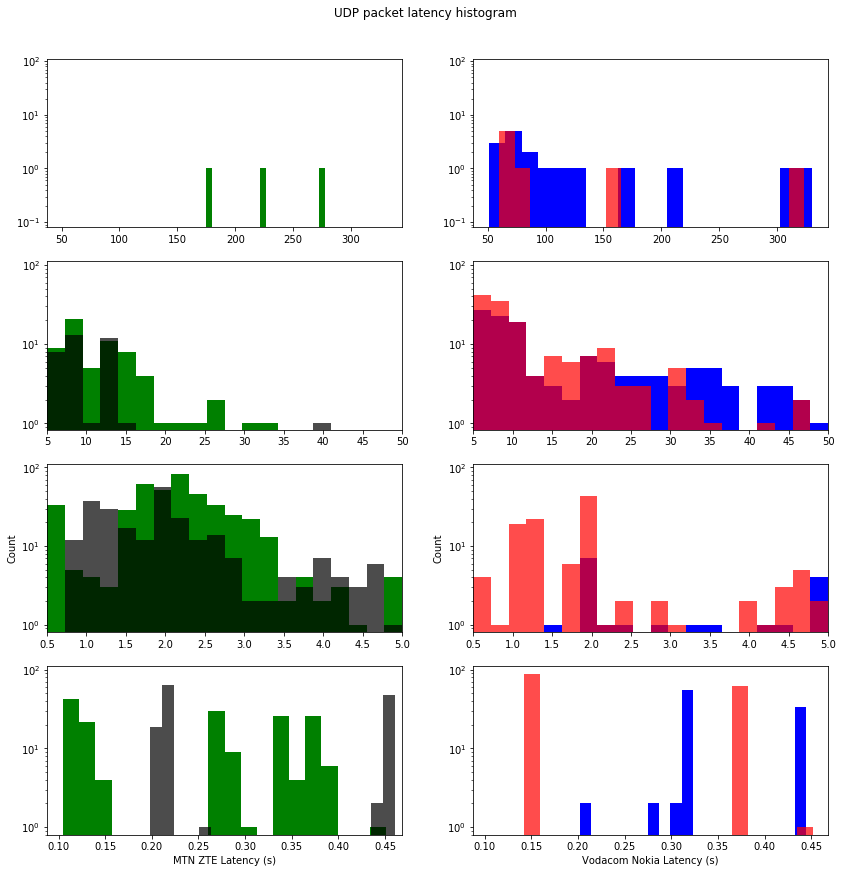

In [36]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 100
        limits = [50000, 5000, 500]
        r, lim = j.splitter(r, a, limits, split)
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=4, hist=True, log=True)

custom jupyter @DanielRobinson
ly None
ly None
ly None
ly None
0.07943282347242814 12.589254117941675


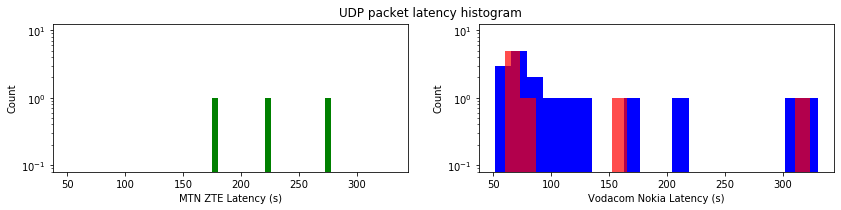

In [35]:
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True, log=True)

In [ ]:
# plt.hist?

custom jupyter @DanielRobinson
0.7235270725637478 894.2305333612721


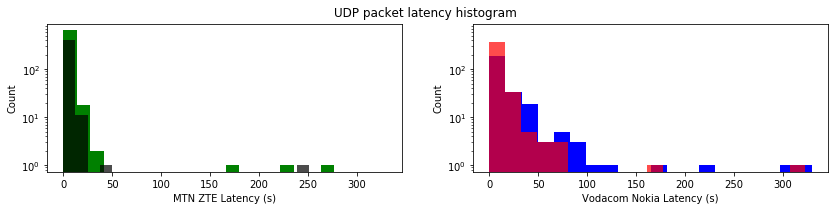

In [27]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'txTime':
        r *= a > 0
#     elif key == 'Signal power':
#         r *= a > -1350
#         # lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True, log=True)

custom jupyter @DanielRobinson
0.0 679.35


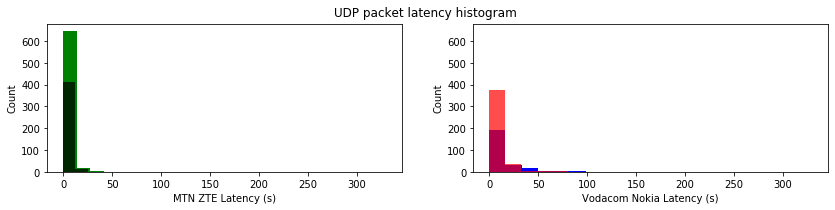

In [28]:
compare(files, thresh, 'UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, split=1, hist=True)

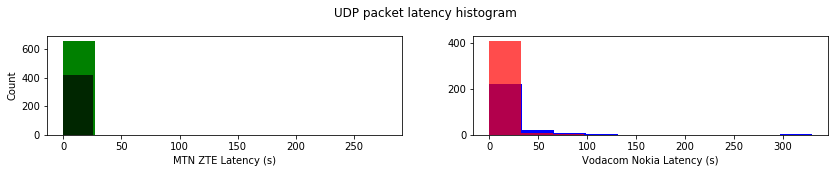

In [6]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    if key == 'txTime':
        r *= a > 100
#         if split == 0:
#             r *= a >= 10000
#         if split == 1:
#             r *= a >= 1000
#             r *= a < 10000
#         if split == 2:
#             r *= a < 1000
#     elif key == 'Signal power':
#         return a > -1450
    return r
compare('UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, 'all_nw', 'all', 1, True)